Customer Segmentation Using K-Means Clustering in Pharmacy Mangement System
---

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [168]:
customer_data = pd.read_csv("customer.csv")
tablet_data = pd.read_csv("tablet_data.csv")
tablet_data['Total']=tablet_data['Total'].astype(int)

In [169]:
merged_data = pd.merge(customer_data, tablet_data, on="Cust_id")

In [170]:
final_data = merged_data.groupby('Cust_id').agg({
    'Age': 'first',
    'City': 'first',
    'Gender': 'first',
    'Quantity': 'sum',
    'Total': 'sum'
}).reset_index()

In [171]:
le = LabelEncoder()
final_data['City'] = le.fit_transform(final_data['City'])
final_data['Gender'] = le.fit_transform(final_data['Gender'])

In [172]:
final_data.tail(20)

,Cust_id,Age,City,Gender,Quantity,Total
130,131,33,0,2,20,140
131,132,26,0,2,30,240
132,133,29,0,2,26,182
133,134,22,0,2,30,300
134,135,36,0,2,144,1014
135,136,28,0,0,25,225
136,137,26,0,0,57,493
137,138,27,3,0,25,175
138,139,32,3,0,26,182
139,140,24,3,0,27,189


In [173]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Cust_id   150 non-null    int64
 1   Age       150 non-null    int64
 2   City      150 non-null    int32
 3   Gender    150 non-null    int32
 4   Quantity  150 non-null    int64
 5   Total     150 non-null    int32
dtypes: int32(3), int64(3)
memory usage: 5.4 KB


In [174]:
final_data.shape

(150, 6)

In [175]:
final_data.isnull().sum()

Cust_id     0
Age         0
City        0
Gender      0
Quantity    0
Total       0
dtype: int64

In [176]:
X = final_data[[ 'Quantity', 'Total']]

In [177]:
from sklearn.cluster import KMeans
wcss=[]

In [178]:
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

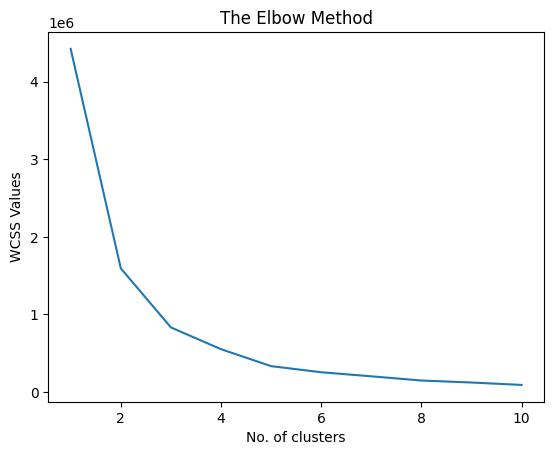

In [179]:
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS Values")
plt.show()

In [180]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X)

final_data['Cluster']=y_kmeans

In [181]:
final_data.head(5)

,Cust_id,Age,City,Gender,Quantity,Total,Cluster
0,1,22,2,1,45,449,2
1,2,22,2,0,44,253,0
2,3,22,2,1,32,275,0
3,4,25,1,1,72,679,1
4,5,27,1,1,33,330,0


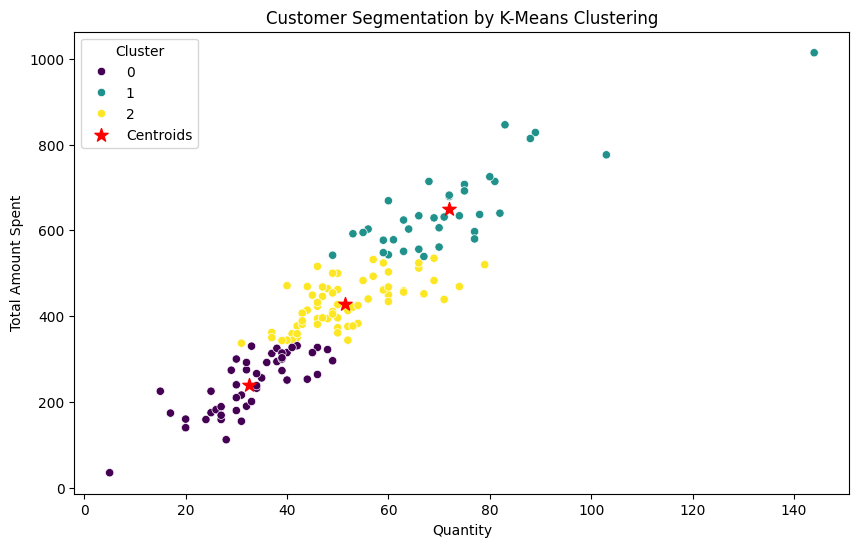

In [182]:
centroids = kmeans.cluster_centers_

# Plot clusters with centroids
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Total', hue='Cluster', data=final_data, palette='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=100, c='red', label='Centroids')
plt.title('Customer Segmentation by K-Means Clustering')
plt.xlabel('Quantity')
plt.ylabel('Total Amount Spent')
plt.legend(title='Cluster')
plt.show()

In [183]:
# Cluster profiling
final_data['Cluster'] = y_kmeans
cluster_profiles = final_data.groupby('Cluster').agg({
    'Age': ['mean', 'median'],
    'City': lambda x: x.mode().iloc[0],
    'Gender': lambda x: x.mode().iloc[0],
    'Quantity': ['mean', 'median'],
    'Total': ['mean', 'median']
})
print(cluster_profiles)


               Age            City   Gender   Quantity              Total  \
              mean median <lambda> <lambda>       mean median        mean   
Cluster                                                                     
0        28.469388   27.0        0        0  32.408163   32.0  238.693878   
1        28.162162   26.0        1        1  71.945946   70.0  648.945946   
2        28.109375   26.0        0        1  51.515625   50.0  429.437500   

                
        median  
Cluster         
0        251.0  
1        629.0  
2        429.5  


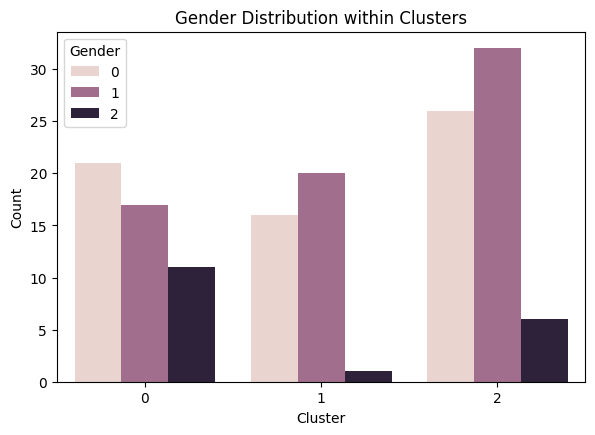

In [184]:
# Visualizing demographic distributions within clusters
plt.figure(figsize=(15, 10))

# Gender Distribution within Clusters
plt.subplot(2, 2, 1)
sns.countplot(x='Cluster', hue='Gender', data=final_data)
plt.title('Gender Distribution within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')

plt.show()

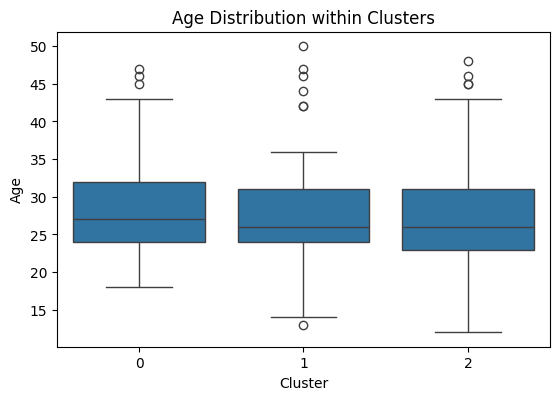

In [185]:
# Age Distribution within Clusters

plt.figure(figsize=(14, 9))
plt.subplot(2, 2, 2)
sns.boxplot(x='Cluster', y='Age', data=final_data)
plt.title('Age Distribution within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Age')

plt.show()

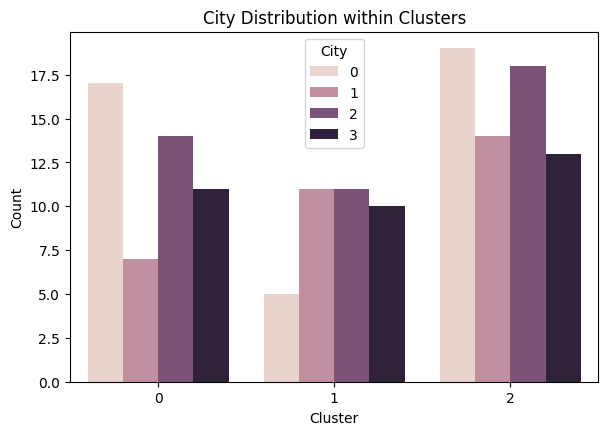

In [186]:
# City Distribution within Clusters

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 3)
sns.countplot(x='Cluster', hue='City', data=final_data)
plt.title('City Distribution within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()